In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def generate_data_points(n_centers: int, n_points_per_center: int, factor: int = 10000):
    data_points = np.ndarray(shape=(n_centers * n_points_per_center, 2))

    for i in range(n_centers):
        data_points[i * n_points_per_center : (i * n_points_per_center) + n_points_per_center] = np.random.normal(
            loc=[ np.random.choice([ -1, 1 ]) * (i + 1) * factor for _ in range(2) ],
            scale=[ np.random.random() * (factor / np.random.random()) for _ in range(2) ],
            size=( n_points_per_center, 2 )
        )

    # Just to avoid negative numbers.
    data_points = data_points + np.abs(np.min(data_points))

    return data_points

In [50]:
def plot_data_points(data_points: np.ndarray, title: str) -> None:
    x = data_points[:, 0]
    y = data_points[:, 1]

    plt.figure(figsize=(20, 5))

    plt.title(title)

    plt.plot(x, y, 'o')
    plt.grid()

    plt.show()

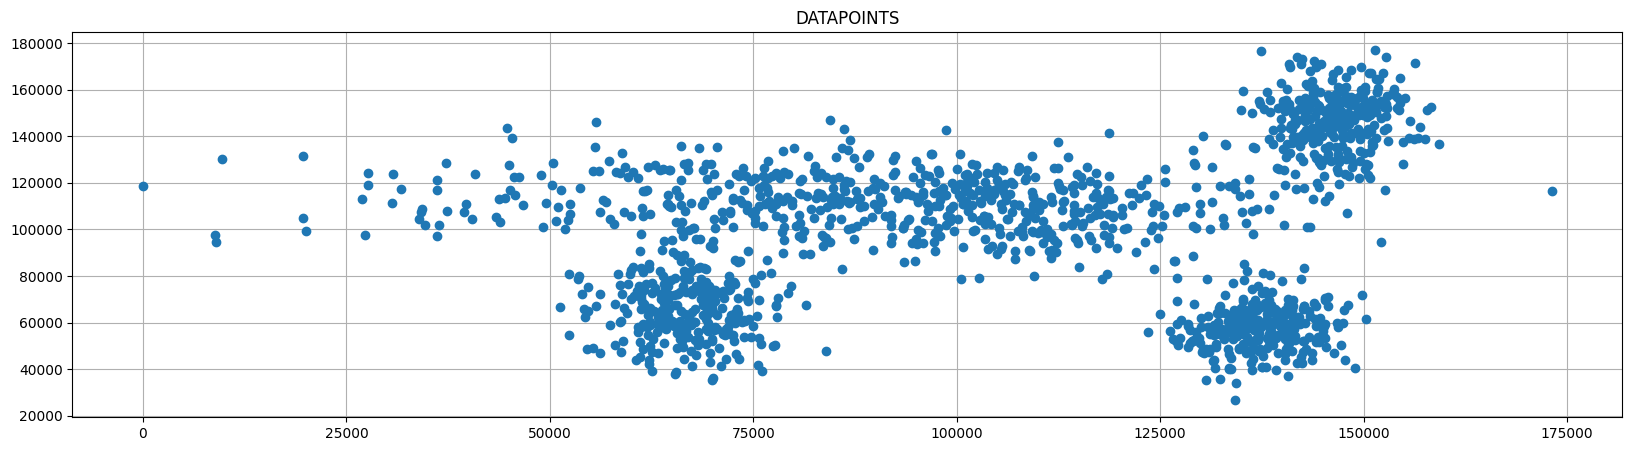

In [232]:
data_points = generate_data_points(n_centers=5, n_points_per_center=300)
plot_data_points(data_points, 'DATAPOINTS')

In [173]:
def plot_clusters(clusters: dict, title: str, colors, centroids, cphist) -> None:
    plt.figure(figsize=(20, 5))

    plt.title(title)

    for i in range(len(clusters)):
        data_points = np.array(clusters[i])

        x = data_points[:, 0]
        y = data_points[:, 1]

        plt.plot(x, y, 'o', color=colors[i])

    for i in range(len(clusters)):
        chist = np.array(cphist[i])
        x = chist[:, 0]
        y = chist[:, 1]
        plt.plot(x, y, '--o', color='black', markersize=6, markeredgewidth=1.5, markerfacecolor='white', linewidth=2)

    for i in range(len(clusters)):
        c = centroids[i]
        if len(c) != 0:
            plt.plot(c[0], c[1], 'o', color='black', markersize=12, markeredgewidth=1.5, markerfacecolor='white')

    plt.grid()

    plt.show()

In [174]:
def euclidian_dist(p1: np.ndarray, p2: np.ndarray) -> float:
    s = np.sum([ (s1 - s2) ** 2 for s1, s2 in zip(p1, p2) ])
    return np.sqrt(s)

In [175]:
def kmeans(k: int, data_points: np.ndarray, threshold: float = 0.5, max_iterations: int = 200):
    # Generating the centroids:
    idx_centroids = np.random.choice(data_points.shape[0], size=k)
    centroids: np.ndarray = np.copy(data_points[idx_centroids])

    # DICT Specification: keys: index_centroid, value: list of points of that cluster
    points_per_centroid = { x: list() for x in range(k) }

    colors = [ ( np.random.random(), np.random.random(), np.random.random(), 1.0 ) for i in range(k) ]

    cphist = { i: [] for i in range(centroids.shape[0]) }
    for i in range(centroids.shape[0]):
        cphist[i].append(np.copy(centroids[i]))

    for iter_n in range(max_iterations):
        # Empty the clusters
        for c in points_per_centroid:
            points_per_centroid[c] = list()

        # Clusterization
        for point in data_points:
            distances = [ euclidian_dist(point, c) for c in centroids ]
            closer_centroid = np.argmin(distances)
            points_per_centroid[closer_centroid].append(point)

        centroids_variation = []

        # Centroid reposition
        for i in range(centroids.shape[0]):
            points = np.array(points_per_centroid[i])

            if len(points) == 0:
                continue

            new_pos = np.array([ np.mean(col) for col in points.T ])

            centroids_variation.append(euclidian_dist(centroids[i], new_pos))

            centroids[i] = new_pos

            cphist[i].append(np.copy(centroids[i]));

        plot_clusters(points_per_centroid, 'CLUSTERS', centroids=centroids, colors=colors, cphist=cphist)

        if all(np.array(centroids_variation) <= threshold):
            break

    return points_per_centroid, centroids

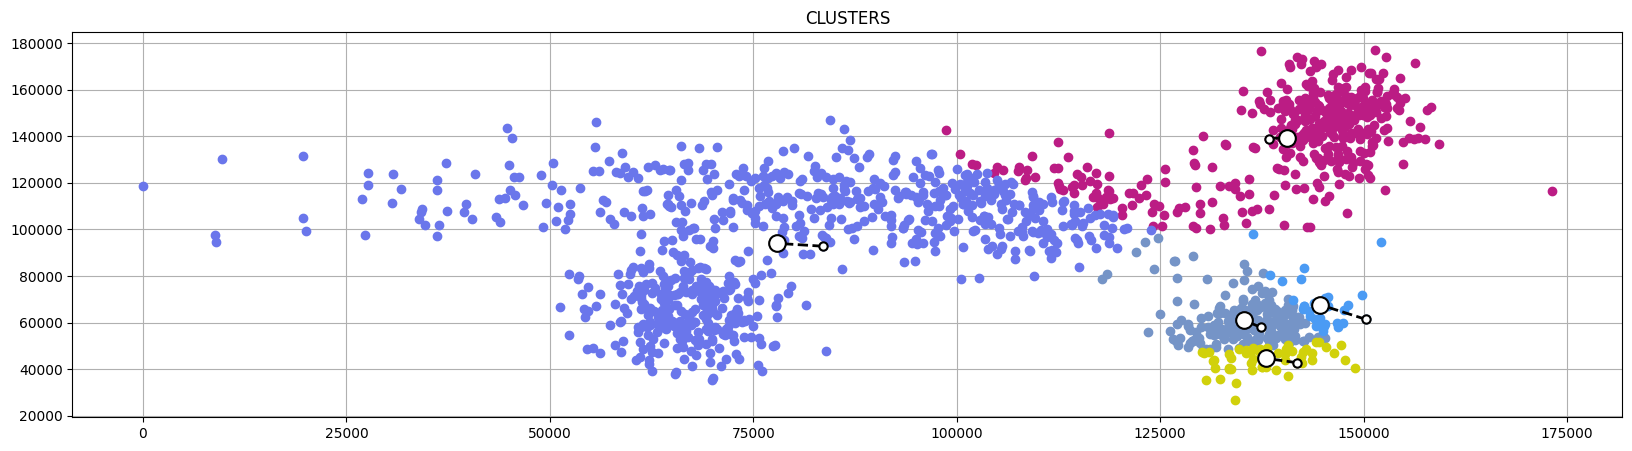

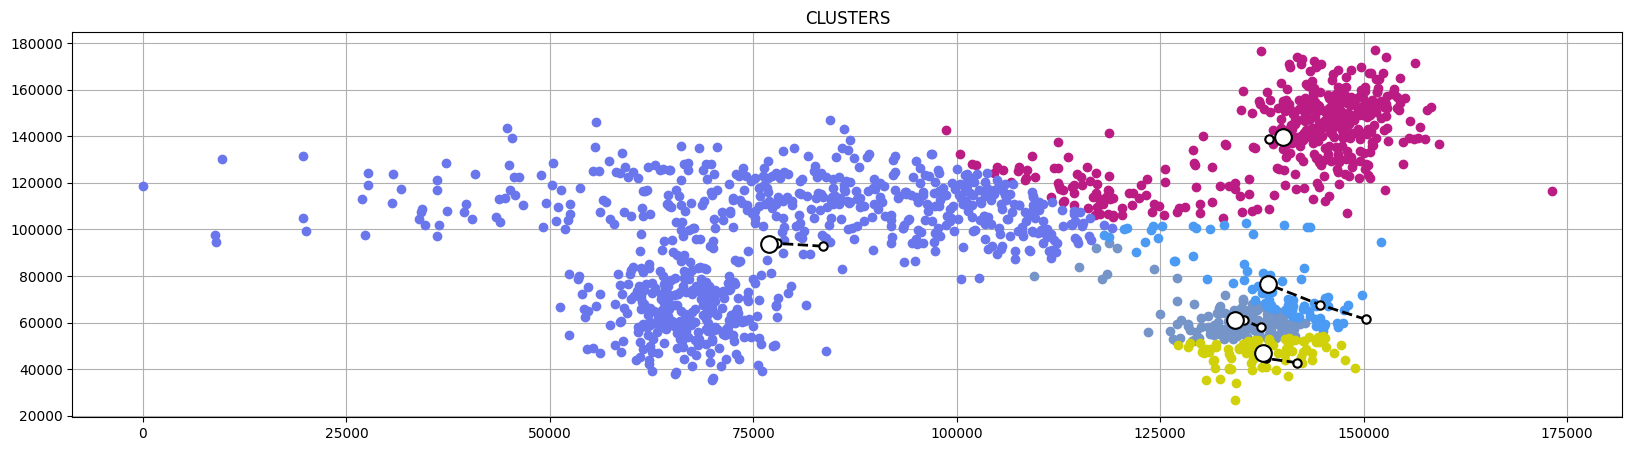

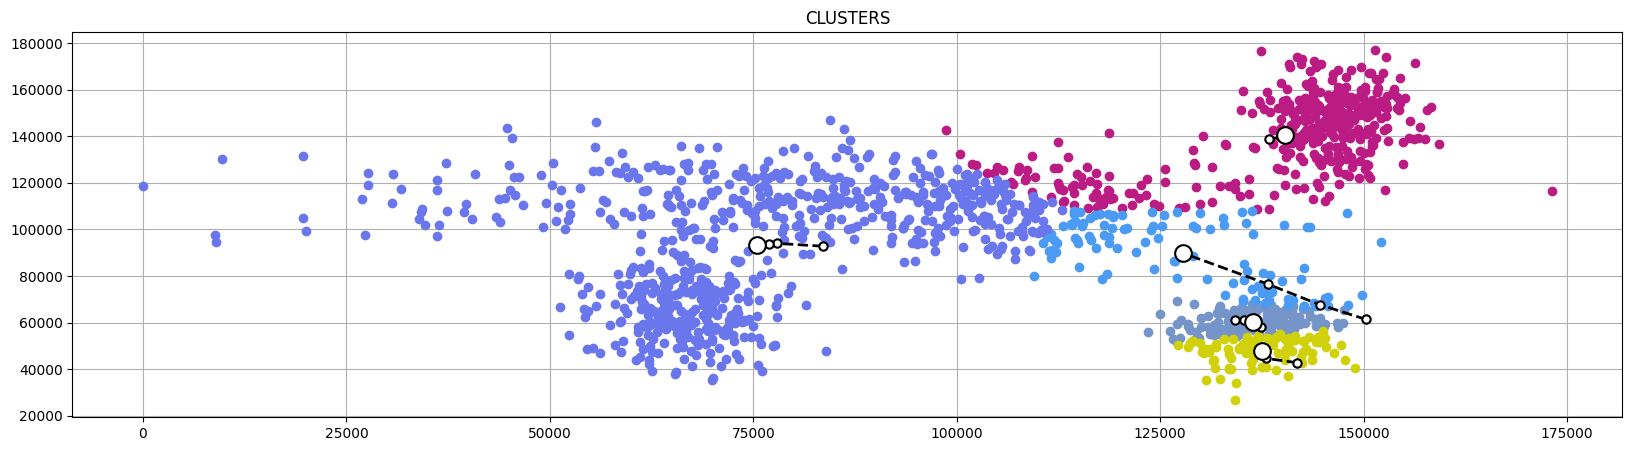

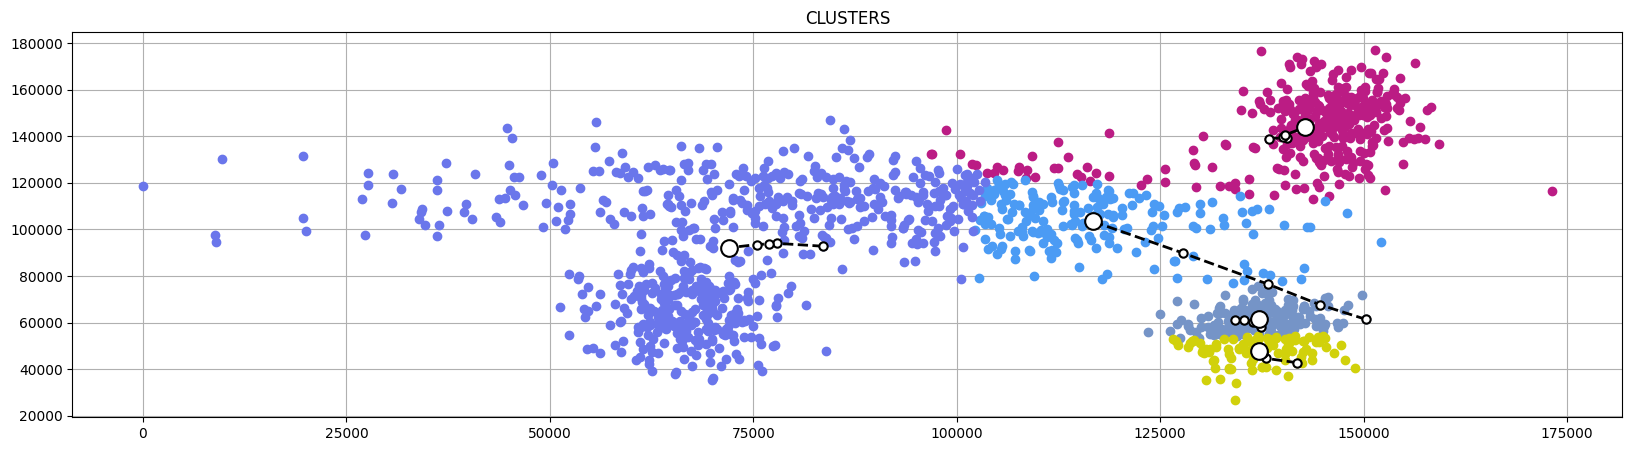

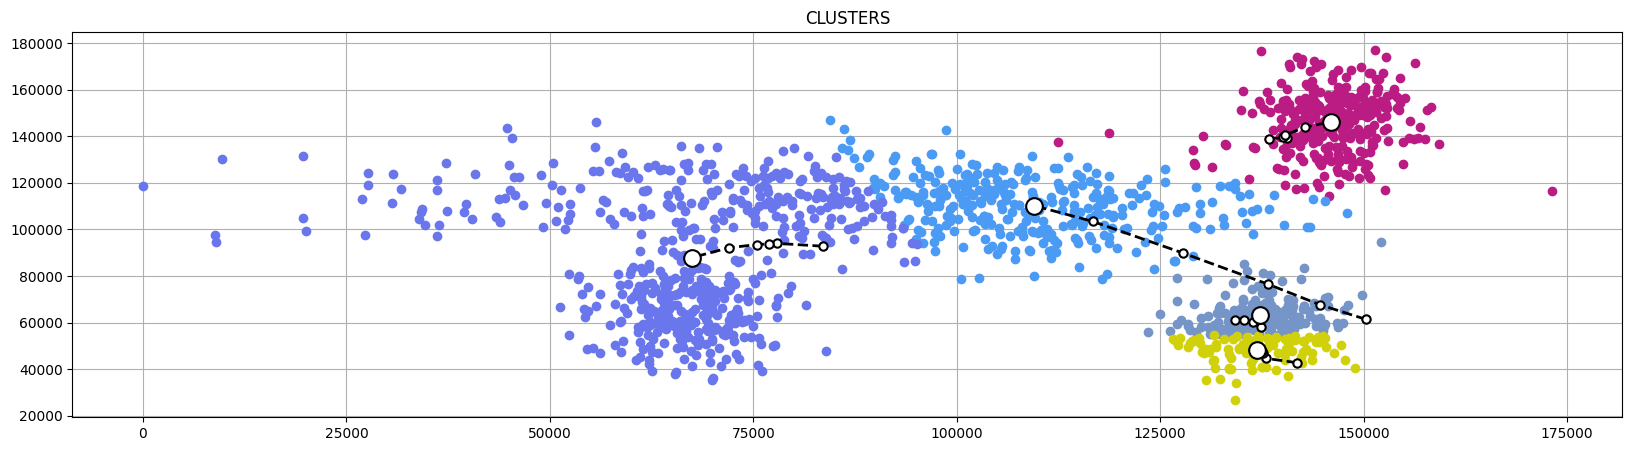

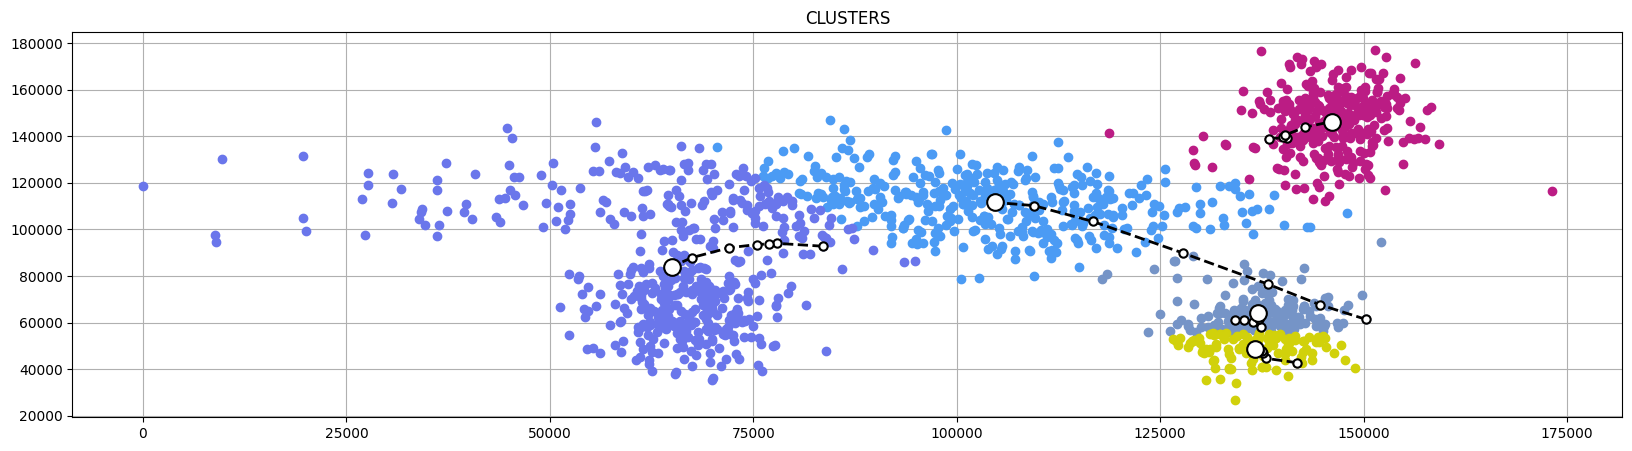

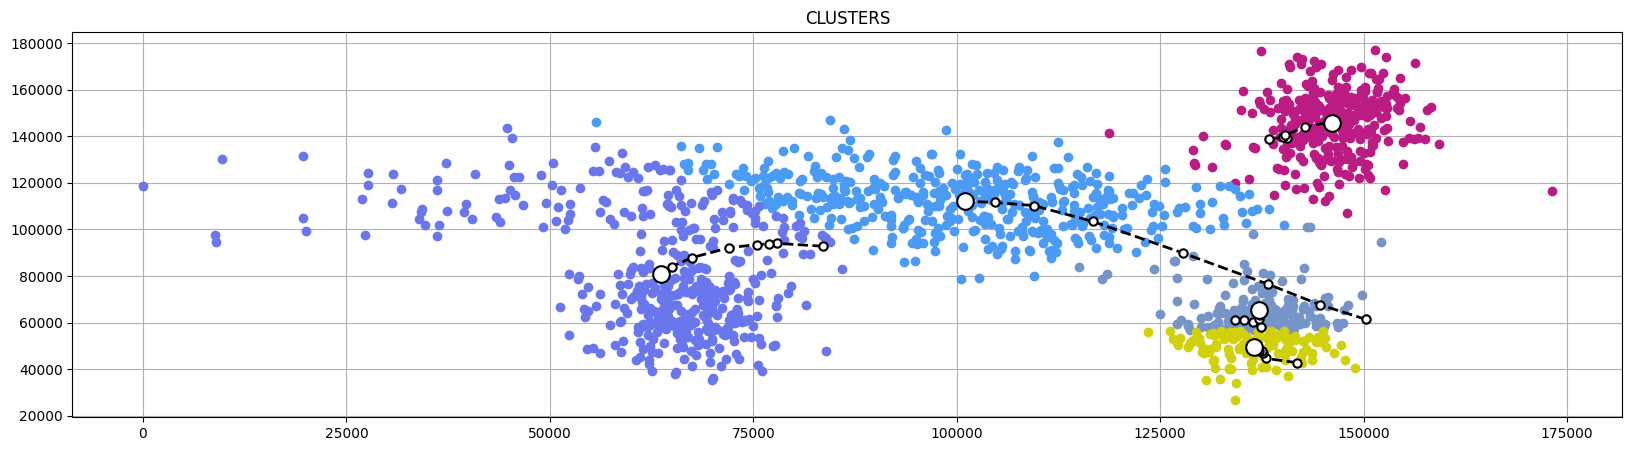

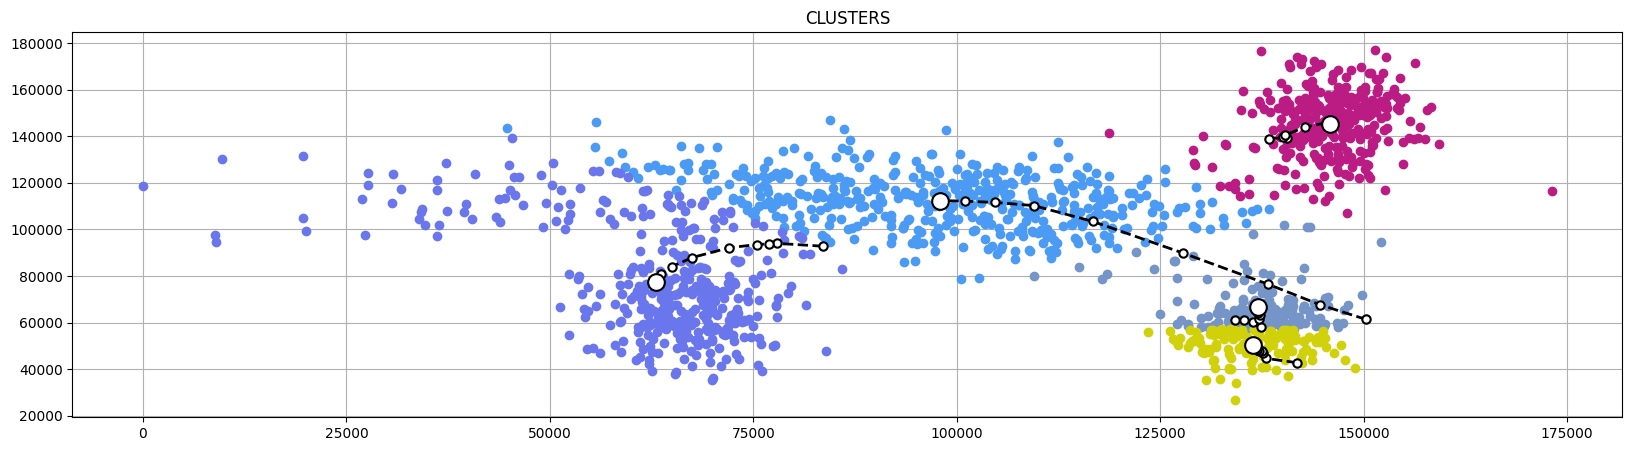

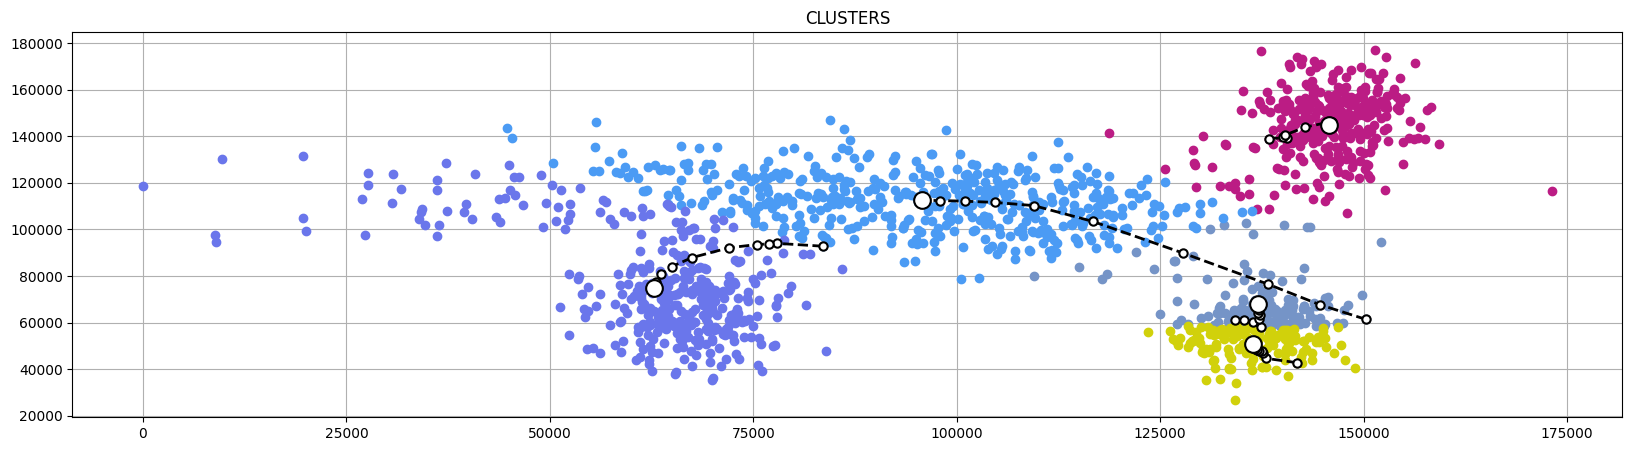

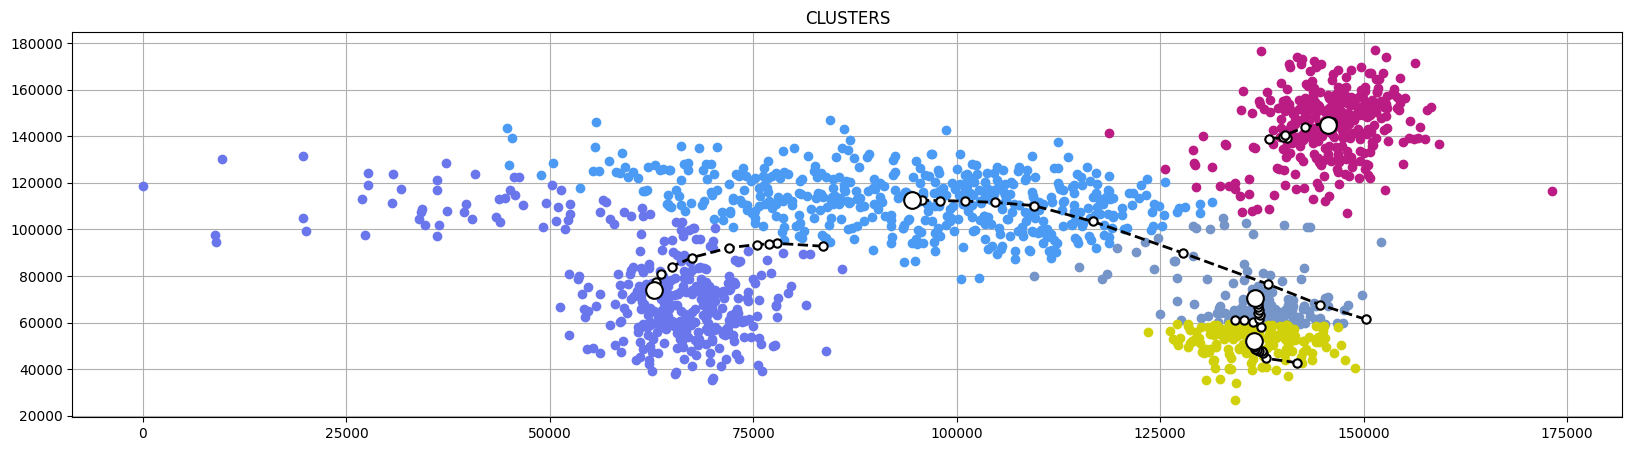

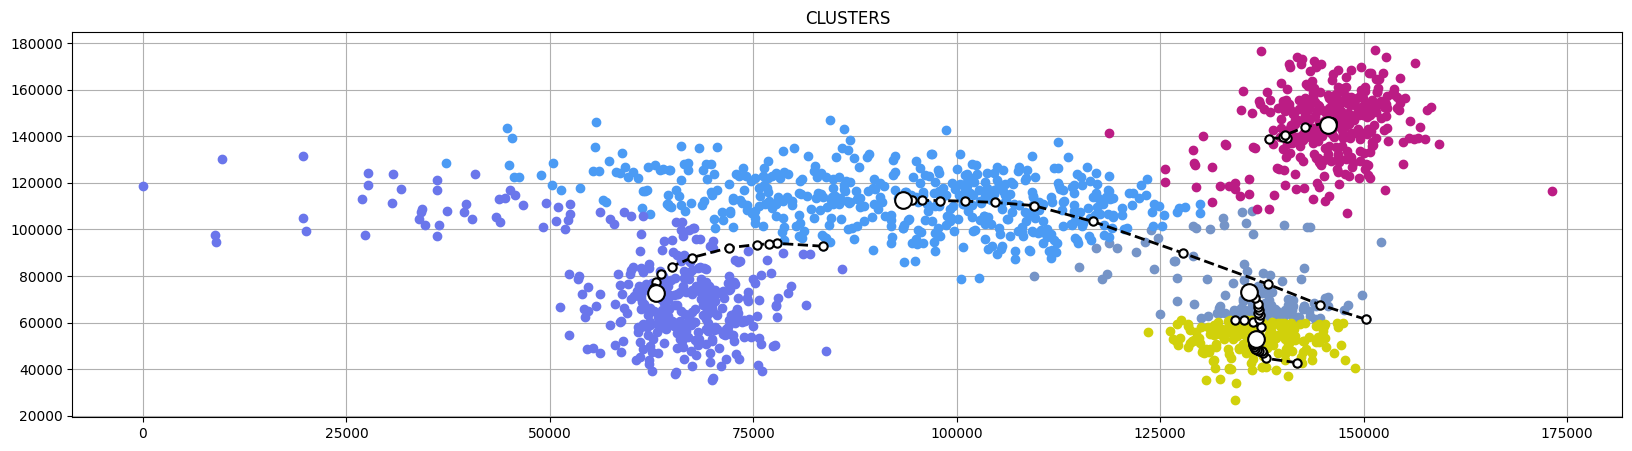

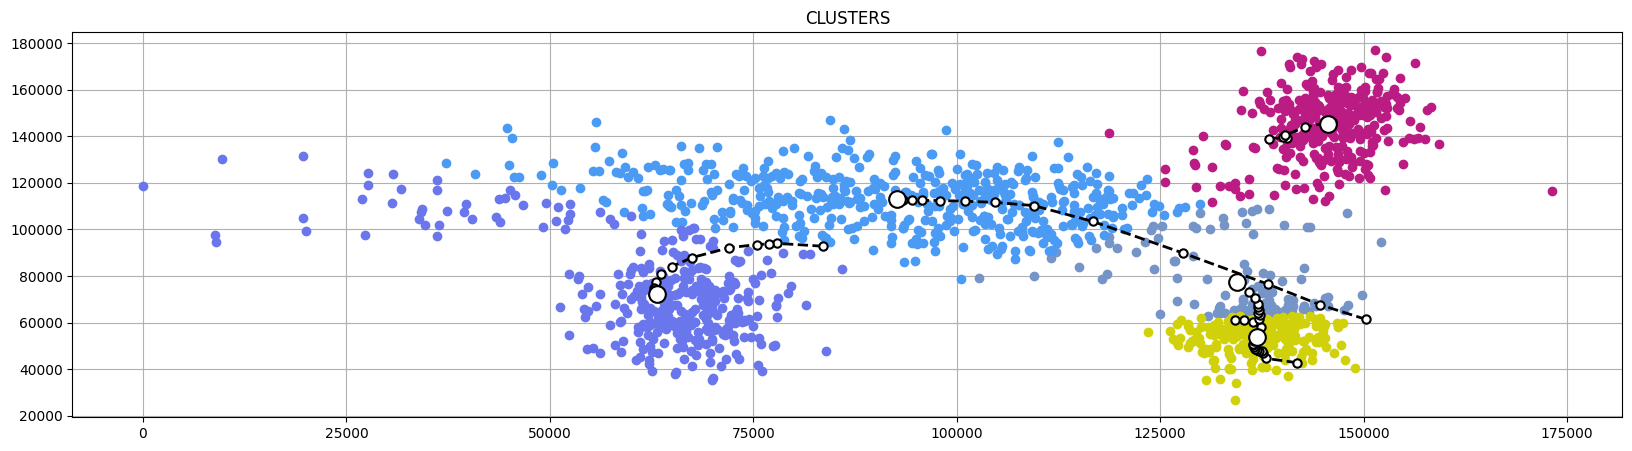

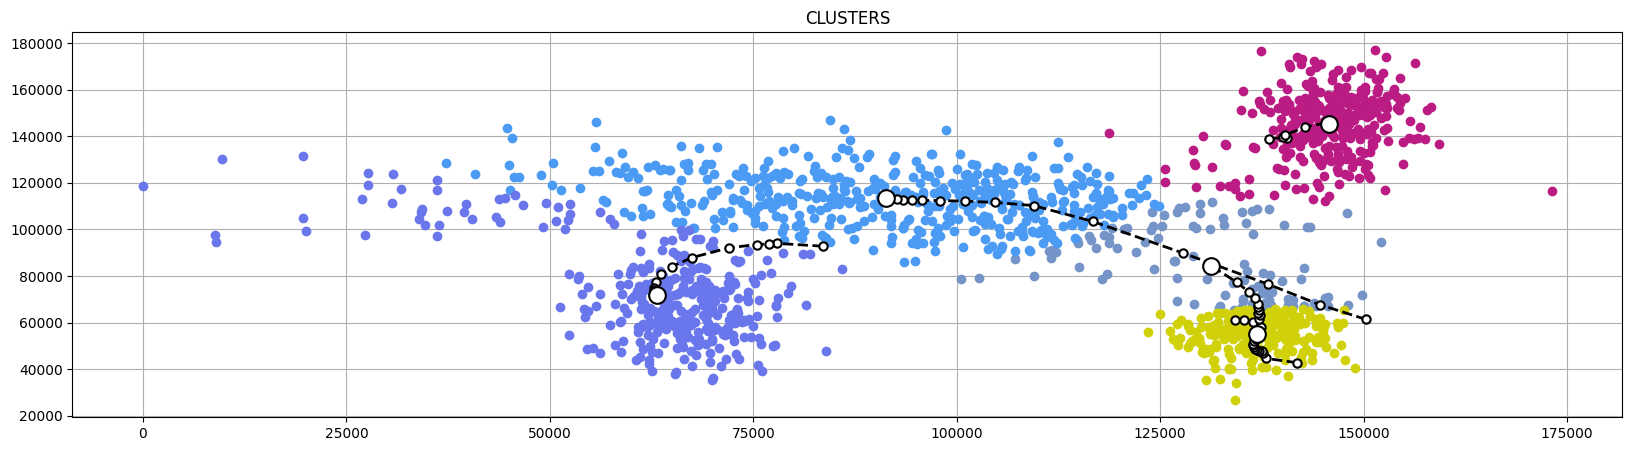

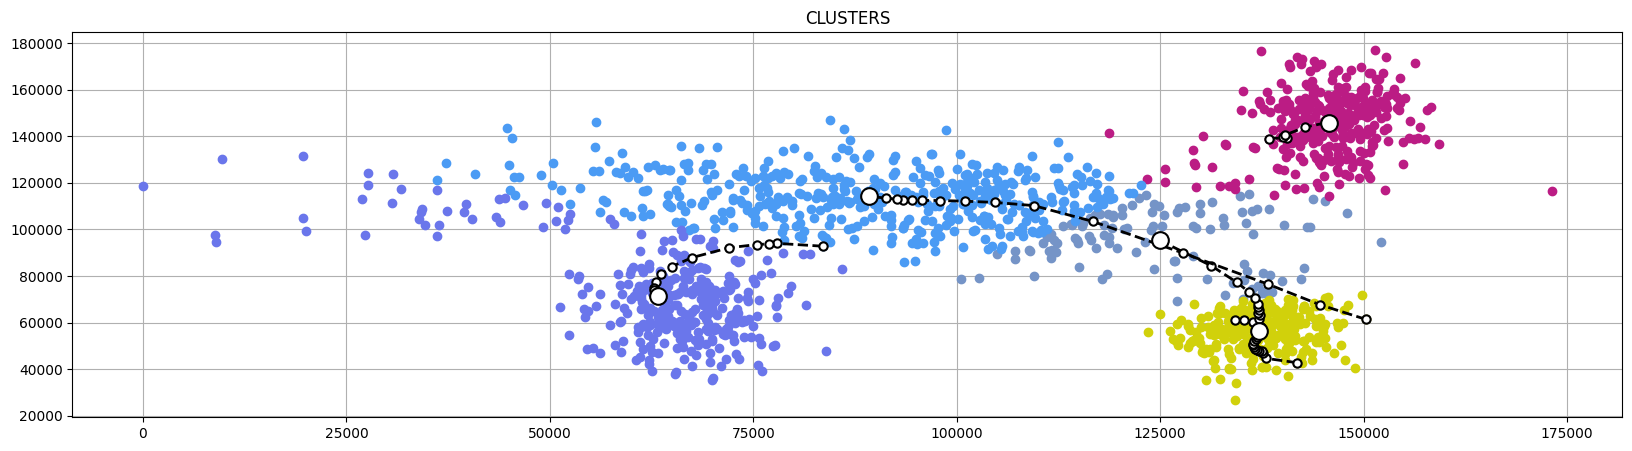

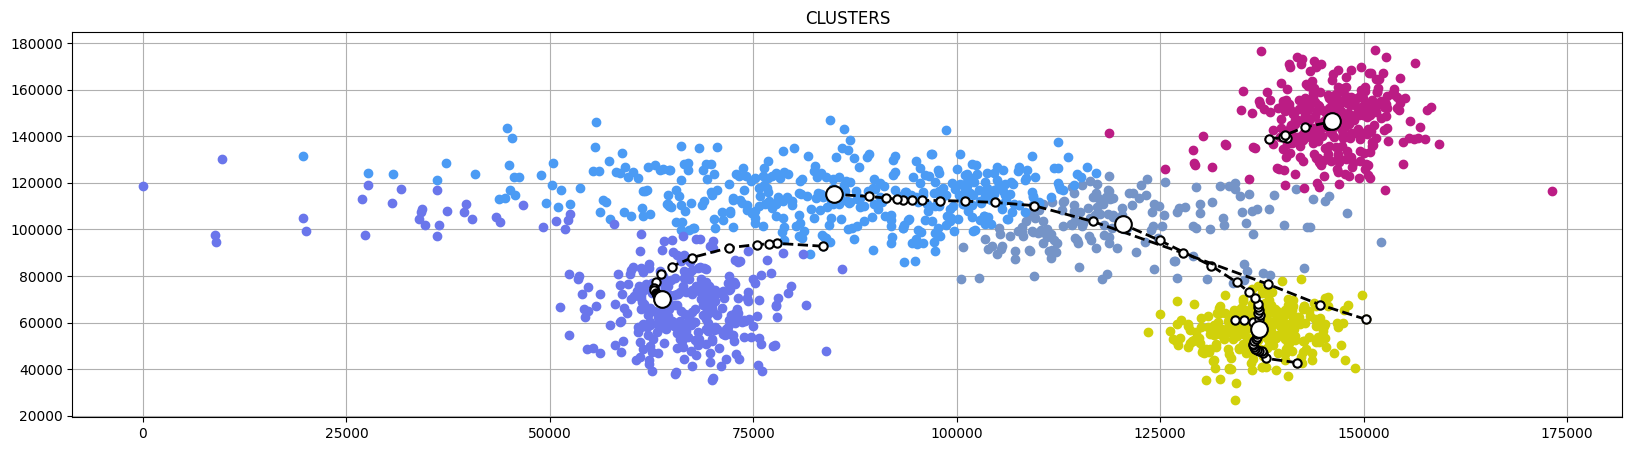

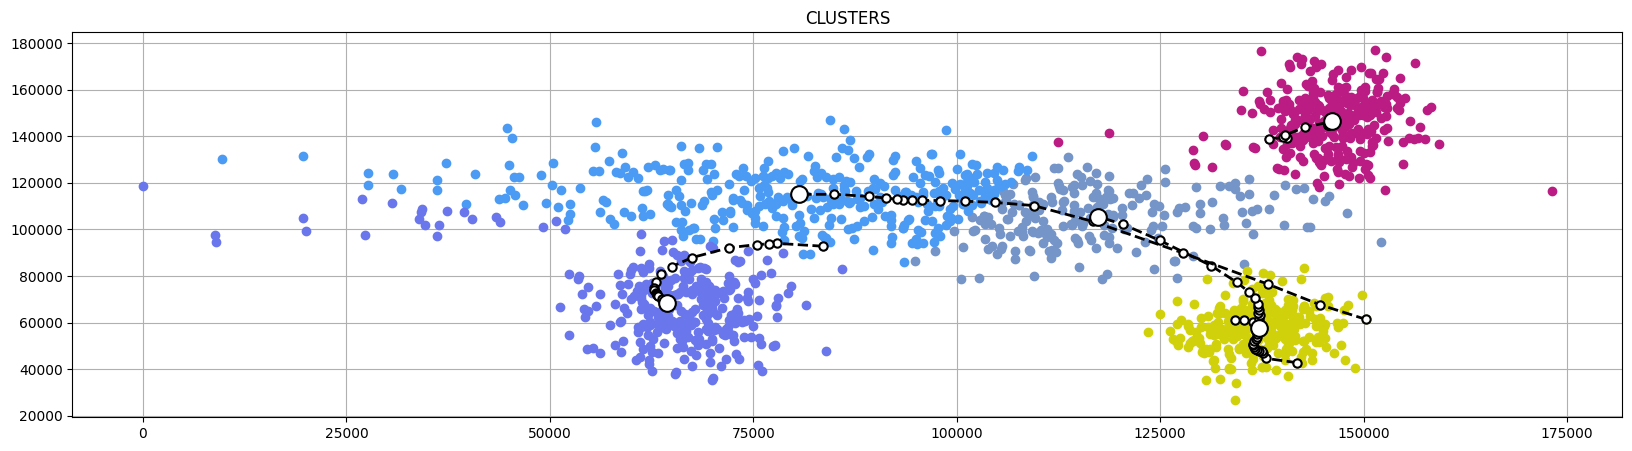

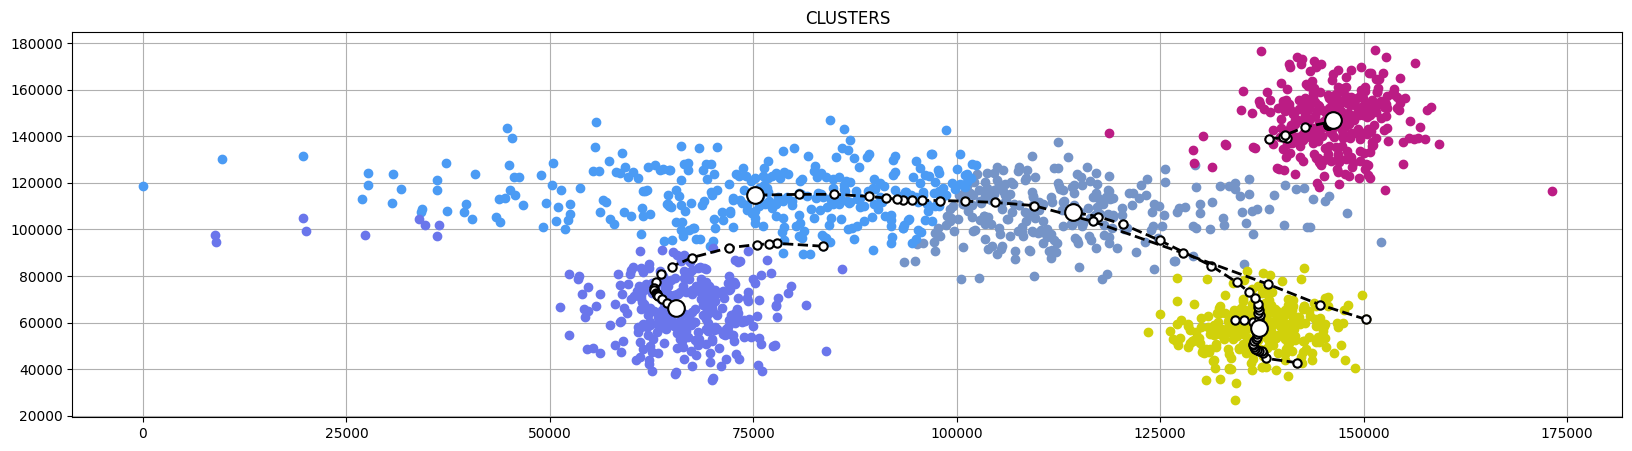

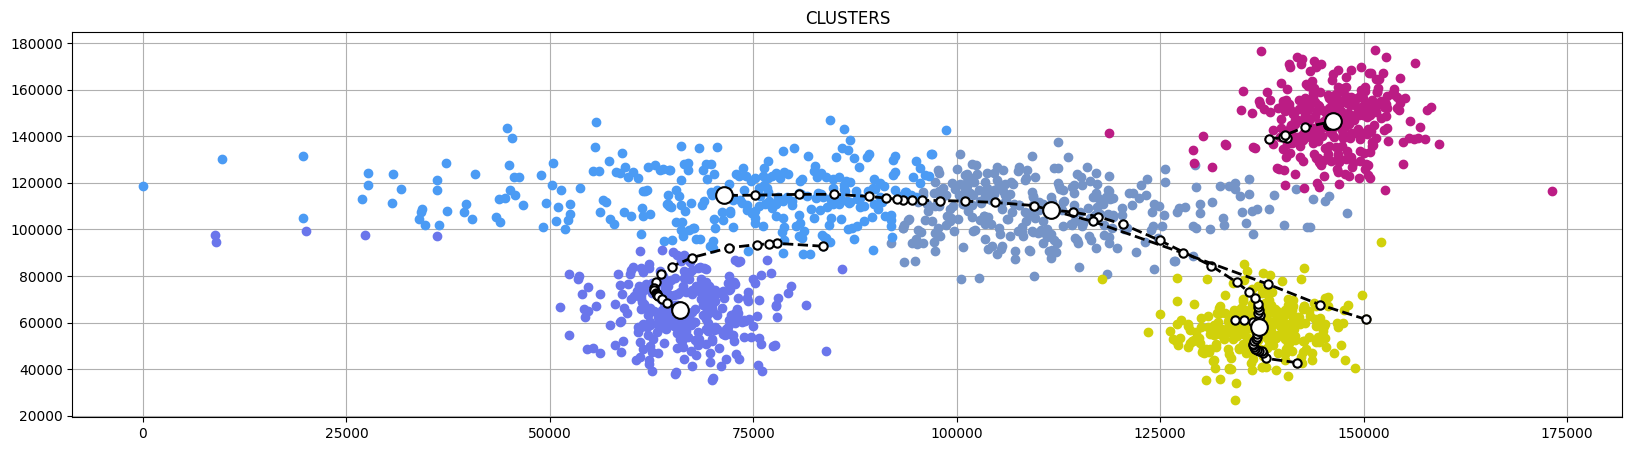

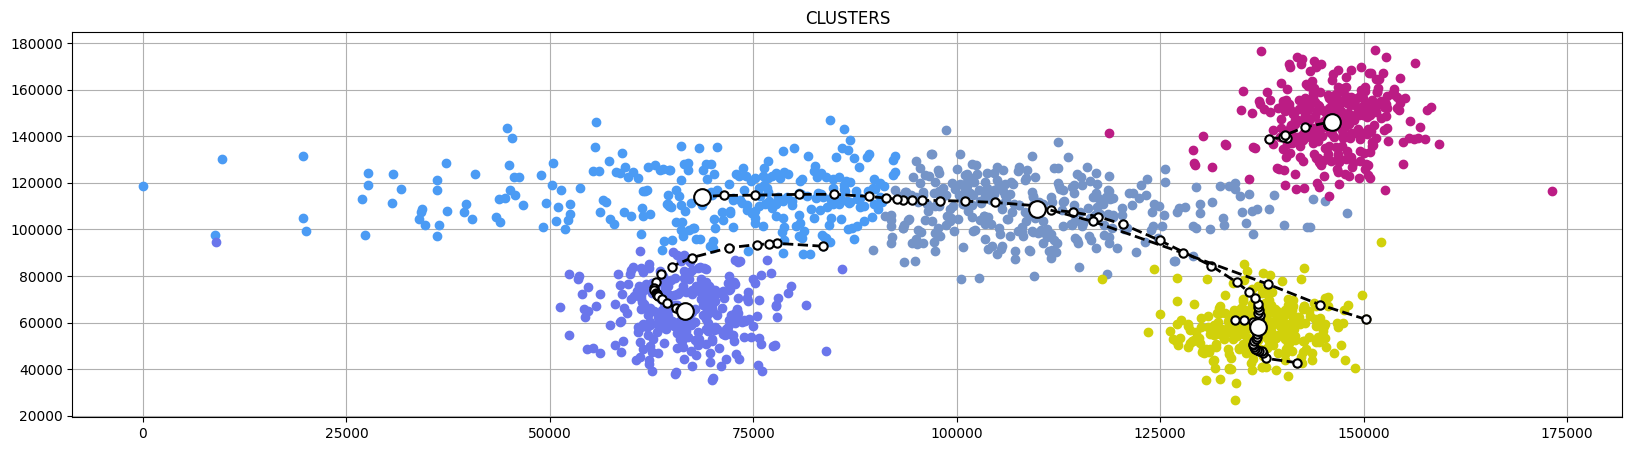

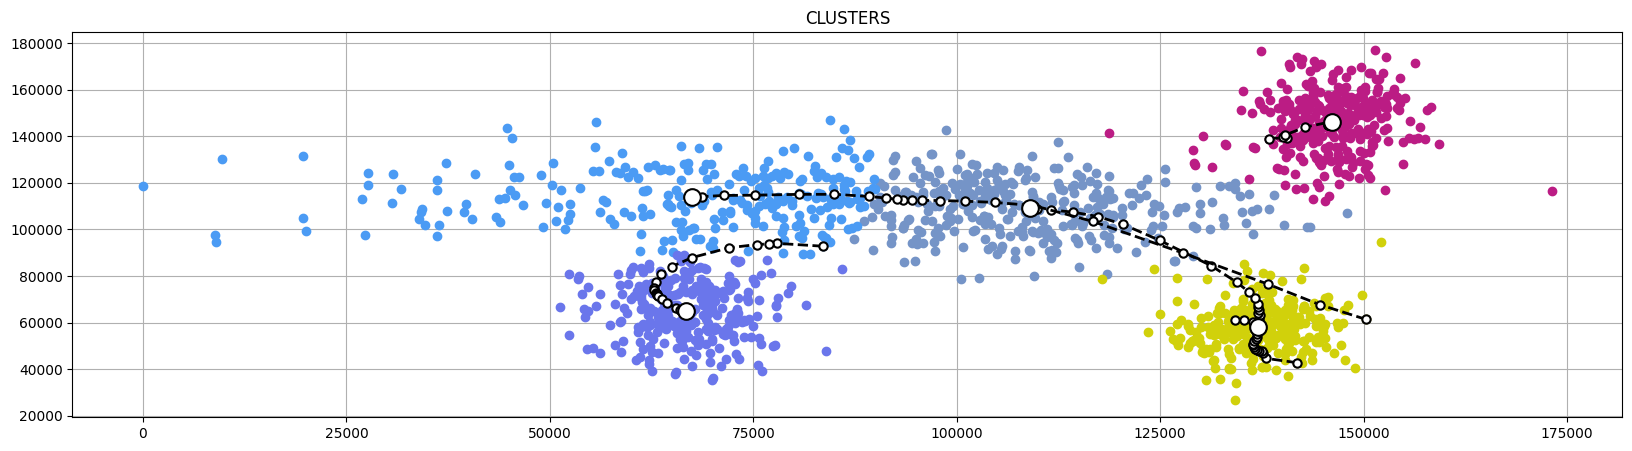

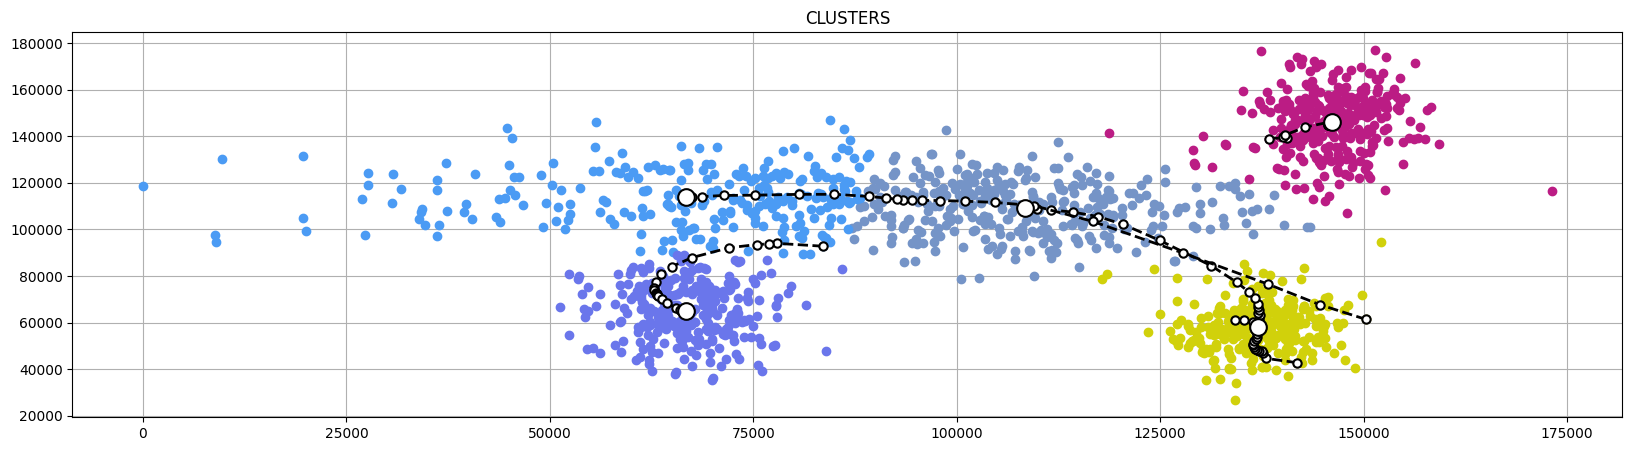

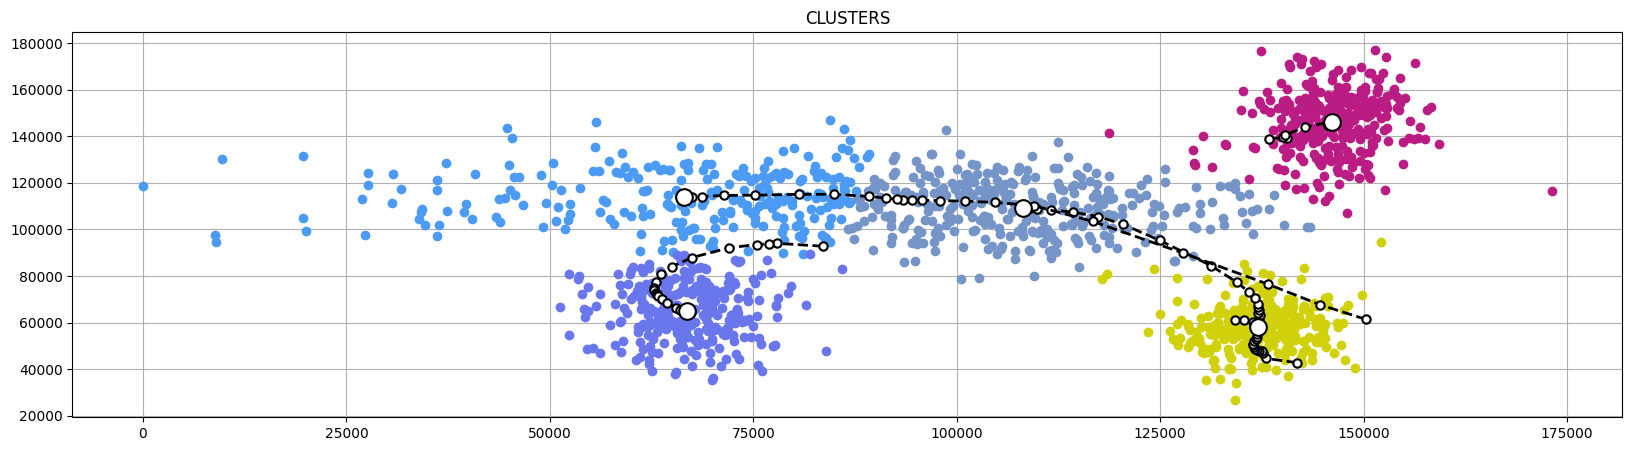

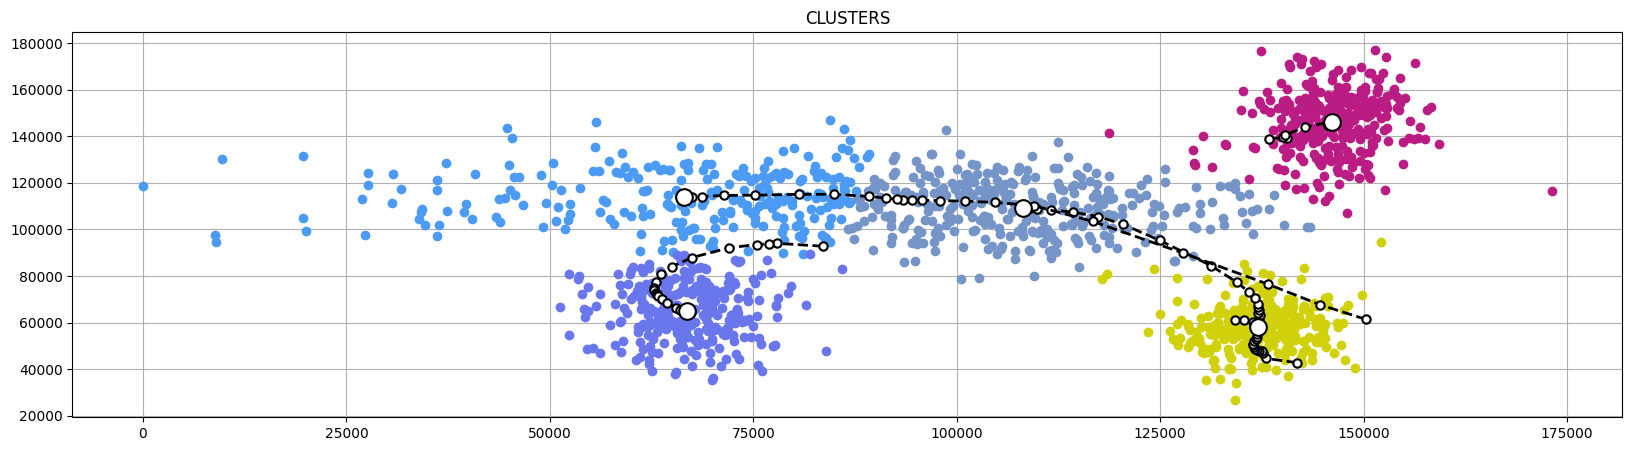

In [237]:
clusters, centroids = kmeans(5, data_points, threshold=1.0)